In [26]:
import pathlib

import matplotlib as mpl
import numpy as np
import pandas as pd
import scanpy as sc
import scirpy as ir
import seaborn as sns

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

savefig_args = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0,
    "transparent": True,
}
output_dir = "../../figures/figureS4"
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
from statsmodels.stats.multitest import multipletests


def correct_p(df, column, method):
    result = multipletests(df[column], method=method)
    df["significant"] = result[0]
    df[column + "corrected_pvalue"] = result[1]
    return df


plt.style.use("../../scripts/paper_heatmap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
plt.rcParams["legend.markerscale"] = 0.5


def save_figure(
    fig,
    name,
    output_dir=output_dir,
    output_suffix=output_suffix,
    output_formats=output_formats,
    savefig_args=savefig_args,
):
    for output_format in output_formats:
        fig.savefig(
            output_dir + "/" + name + output_suffix + output_format, **savefig_args
        )
    return None


%run ../../scripts/plotting_helper.py

<Figure size 162x162 with 0 Axes>

In [2]:
h5ad = "../../processed_data/h5ad_objects/data/bcells.h5ad"
adata = sc.read_h5ad(h5ad)

In [3]:
adata.layers["log_counts"] = adata.raw.X

In [53]:
adata.layers['log_counts']

<34647x30019 sparse matrix of type '<class 'numpy.float32'>'
	with 117710590 stored elements in Compressed Sparse Row format>

In [60]:
df = sc.get.obs_df(
    adata,
    keys=igh_genes
    + ["JCHAIN", "AICDA", "CD27", "FAS", "IGHGP", "IGHEP1"]
    + [
        "bcelltype",
        "isotype_simple",
        "bcelltype_complex",
        "sample_id",
        "mutation_status",
    ],
    layer="log_counts",
)
# clean the data
print("filtering nan isotypes")
df = df.dropna(subset="isotype_simple")
print(df.shape[0], "cells left")
print("filtering nan bcelltypes")
df = df.dropna(subset="bcelltype")
print(df.shape[0], "cells left")
# remove 0 counts in IGH
df = df[df[igh_genes].sum(axis=1) > 0]
print(df.shape[0], "cells with non-zero igh expression")
# Create Colorbar Dictionaries
row_colors2 = dict(
    zip(adata.obs.bcelltype_complex.unique(), adata.uns["bcelltype_complex_colors"])
)
bcelltype_row = df.bcelltype.map(bcelltype_colors)
igh_row = df.isotype_simple.map(igh_colors_simple)
bcomplex_row = df.bcelltype_complex.map(row_colors2)
mutation_row = df.mutation_status.map(mutation_colors)
sample_id_row = df.sample_id.map(sample_id_colors)

filtering nan isotypes
33926 cells left
filtering nan bcelltypes
33926 cells left
33805 cells with non-zero igh expression


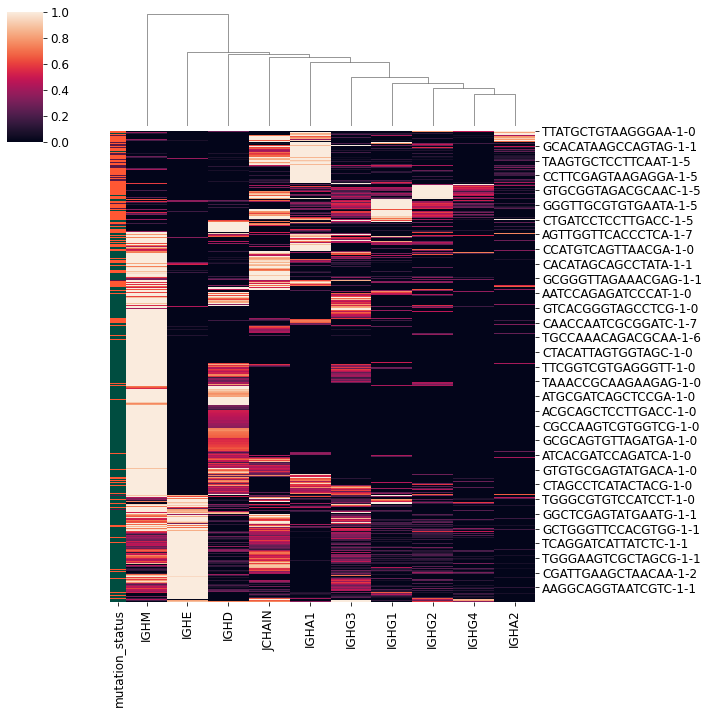

In [55]:
# color by mutation status
g = sns.clustermap(df[igh_genes + ["JCHAIN"]], row_colors=mutation_row, standard_scale=0)
g.ax_row_dendrogram.remove()

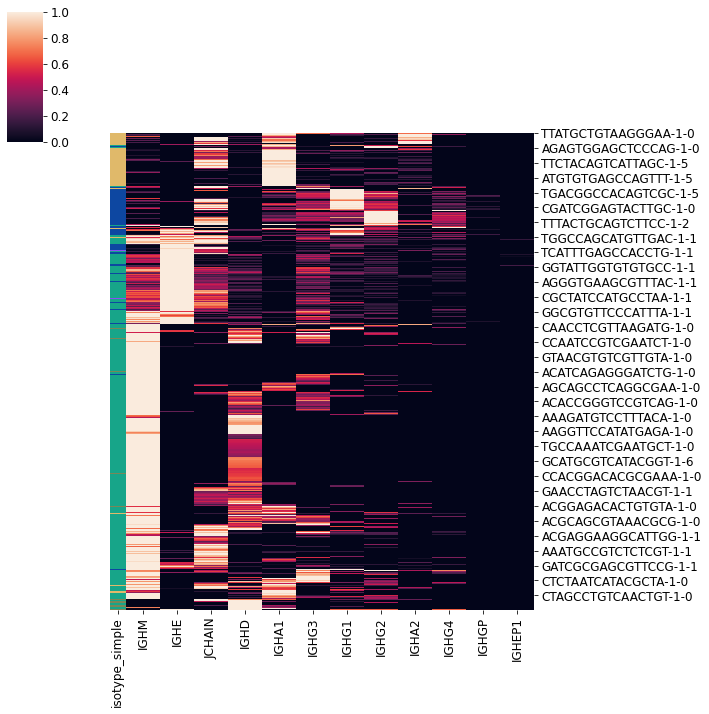

In [62]:
# color by igh call
g = sns.clustermap(df[igh_genes + ["IGHGP", "IGHEP1","JCHAIN"]], row_colors=igh_row, standard_scale=0)
g.ax_row_dendrogram.remove()
g.ax_col_dendrogram.remove()

In [9]:
row_colors = pd.concat([bcelltype_row,igh_row, mutation_row, sample_id_row],axis=1)

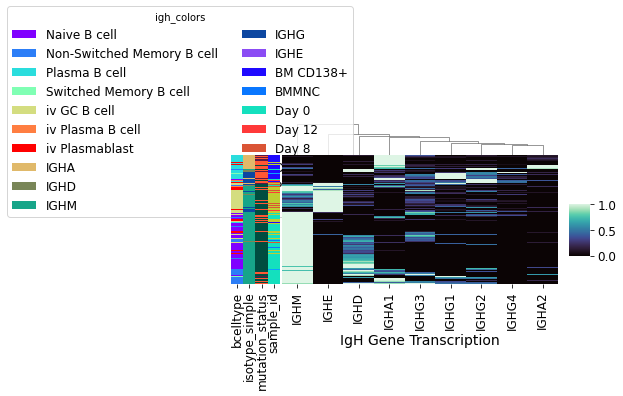

In [131]:
plt.style.use("../../scripts/paper_heatmap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
g = sns.clustermap(df[igh_genes], row_colors=row_colors,
                   standard_scale=0, figsize=(6,4), 
                cbar_kws={'shrink': 0.5}, 
                  linewidths=0, cbar_pos=(1, 0.5, 0.05, 0.18),
xticklabels=True, yticklabels=False,
cmap="mako")
ax = g.ax_heatmap
ax.set_yticklabels([])
ax.set_xlabel("IgH Gene Transcription")
g.ax_row_dendrogram.remove()
#g.ax_col_dendrogram.remove()

# legends

from matplotlib.pyplot import gcf
# bcelltype legend
ser = pd.Series(bcelltype_colors).index
for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=bcelltype_colors[label], label=label, linewidth=0)

l1 = g.ax_col_dendrogram.legend(title='bcelltype', loc="center", 
                                ncol=2, bbox_to_anchor=(0.1, 1), 
                                bbox_transform=gcf().transFigure)
# bcelltype legend
ser = pd.Series(igh_colors_simple).index
for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=igh_colors_simple[label], label=label, linewidth=0)

l2 = g.ax_col_dendrogram.legend(title='igh_colors', loc="center", 
                                ncol=2, bbox_to_anchor=(0.1, 1), 
                                bbox_transform=gcf().transFigure)
ser = pd.Series(sample_id_colors).index
for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=sample_id_colors[label], label=label, linewidth=0)

l2 = g.ax_col_dendrogram.legend(title='igh_colors', loc="center", 
                                ncol=2, bbox_to_anchor=(0.1, 1), 
                                bbox_transform=gcf().transFigure)

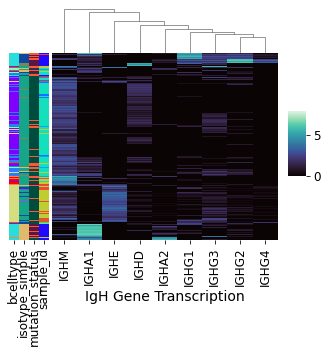

In [56]:
plt.style.use("../../scripts/paper_heatmap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
plt.rcParams["legend.markerscale"] = 0.5
g = sns.clustermap(df[igh_genes], row_colors=row_colors,
                   figsize=(5,5), 
                cbar_kws={'shrink': 0.5}, 
                  linewidths=0, cbar_pos=(1, 0.5, 0.05, 0.18),
xticklabels=True, yticklabels=False,
cmap="mako")
ax = g.ax_heatmap
ax.set_yticklabels([])
ax.set_xlabel("IgH Gene Transcription")
g.ax_row_dendrogram.remove()


In [84]:
sub_df = df[df.sample_id.str.contains('Day')]

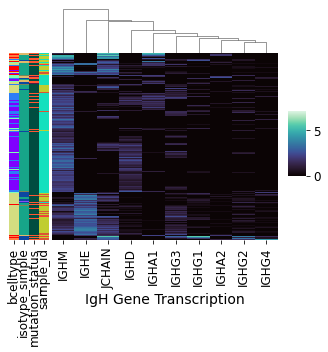

In [112]:
plt.style.use("../../scripts/paper_heatmap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
plt.rcParams["legend.markerscale"] = 0.5
g = sns.clustermap(sub_df[igh_genes + ['JCHAIN']], row_colors=row_colors,
                figsize=(5,5),
                cbar_kws={'shrink': 0.5}, 
                  linewidths=0, cbar_pos=(1, 0.5, 0.05, 0.18),
xticklabels=True, yticklabels=False,
cmap="mako")
ax = g.ax_heatmap
ax.set_yticklabels([])
ax.set_xlabel("IgH Gene Transcription")
g.ax_row_dendrogram.remove()


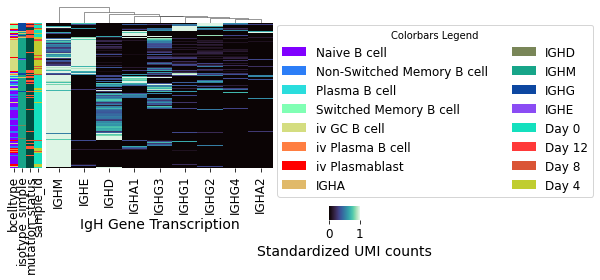

In [162]:
plt.style.use("../../scripts/paper_heatmap.mplstyle")
width = plt.rcParams["figure.figsize"][0]
height = plt.rcParams["figure.figsize"][1]
g = sns.clustermap(sub_df[igh_genes], row_colors=row_colors,
                   standard_scale=0, figsize=(4.2,4), 
                cbar_kws={'shrink': 0.5, 'orientation':'horizontal', 'label':"Standardized UMI counts"}, 
                  linewidths=0, dendrogram_ratio=(.05, .1), cbar_pos=(1.15, 0.22, 0.1, 0.05),
xticklabels=True, yticklabels=False,
cmap="mako", rasterized = True, )
ax = g.ax_heatmap
ax.set_yticklabels([])
ax.set_xlabel("IgH Gene Transcription")
g.ax_row_dendrogram.remove()
#g.ax_col_dendrogram.remove()

# legends

from matplotlib.pyplot import gcf
# bcelltype legend
ser = pd.Series(bcelltype_colors).index
for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=bcelltype_colors[label], label=label, linewidth=0)

l1 = g.ax_col_dendrogram.legend(title='bcelltype', loc="center", 
                                ncol=2, bbox_to_anchor=(0.1, 0), 
                                bbox_transform=gcf().transFigure)
# bcelltype legend
ser = pd.Series(igh_colors_simple).index
for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=igh_colors_simple[label], label=label, linewidth=0)

l2 = g.ax_col_dendrogram.legend(title='igh_colors', loc="center", 
                                ncol=2, bbox_to_anchor=(0.1, 0), 
                                bbox_transform=gcf().transFigure)

ser=pd.Series(sample_id_colors).iloc[2:6].index

for label in ser.unique():
    g.ax_col_dendrogram.bar(0, 0, color=sample_id_colors[label], label=label, linewidth=0)

l2 = g.ax_col_dendrogram.legend(title='Colorbars Legend', loc="center", 
                                ncol=2, bbox_to_anchor=(1.5, 0.6), 
                                bbox_transform=gcf().transFigure)

In [163]:
save_figure(g.fig, "Sterile_Transcript_Heatmap")